In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#load data
df=pd.read_csv(r"D:\Resume  Projects\titanic.csv")
print("Dataset shape:", df.shape)
df.head()

Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
#data exploration
print("Missing values:\n", df.isnull().sum())
print("\nTarget distribution:\n", df['Survived'].value_counts(normalize=True))

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Target distribution:
 Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


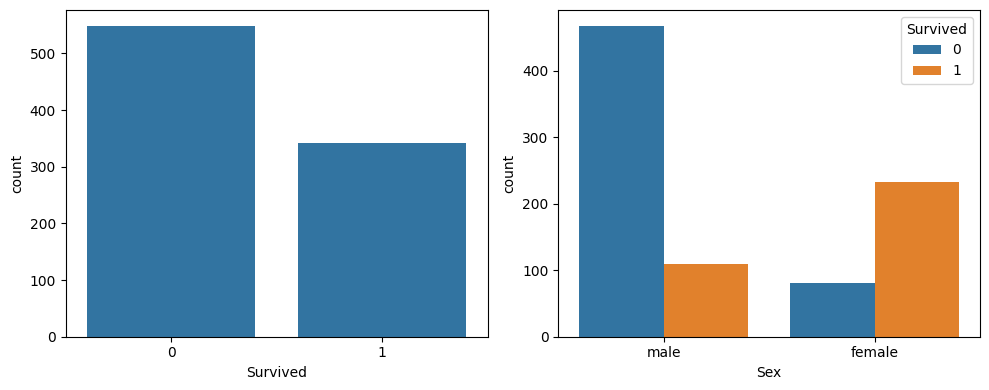

In [3]:
# Quick visualization
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.countplot(data=df, x='Survived')
plt.subplot(1,2,2)
sns.countplot(data=df, x='Sex', hue='Survived')
plt.tight_layout()
plt.show()

In [5]:
#selecting features
# Select features
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
target = "Survived"

data = df[features + [target]].copy()

# Handle missing values (NO warnings)
data["Age"] = data["Age"].fillna(data["Age"].median())
data["Embarked"] = data["Embarked"].fillna(data["Embarked"].mode().iloc[0])
data["Fare"] = data["Fare"].fillna(data["Fare"].median())

# Encode categorical (Safe mapping)
data["Sex"] = data["Sex"].map({"male": 0, "female": 1}).fillna(-1).astype(int)
data["Embarked"] = data["Embarked"].map({"S": 0, "C": 1, "Q": 2}).fillna(-1).astype(int)

print("✅ Clean data shape:", data.shape)
print("✅ Missing values:", data.isnull().sum().sum())
data.head()



✅ Clean data shape: (891, 8)
✅ Missing values: 0


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,1
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,0


In [7]:
display(data)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,0,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,1
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,1
4,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,0
887,1,1,19.0,0,0,30.0000,0,1
888,3,1,28.0,1,2,23.4500,0,0
889,1,0,26.0,0,0,30.0000,1,1


In [8]:
#train test split
from sklearn.model_selection import train_test_split

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")


Training set: (712, 7)
Test set: (179, 7)


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Random Forest (strong baseline)
model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


✅ Accuracy: 0.810 (81.0%)

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       110
           1       0.86      0.61      0.71        69

    accuracy                           0.81       179
   macro avg       0.82      0.77      0.79       179
weighted avg       0.82      0.81      0.80       179



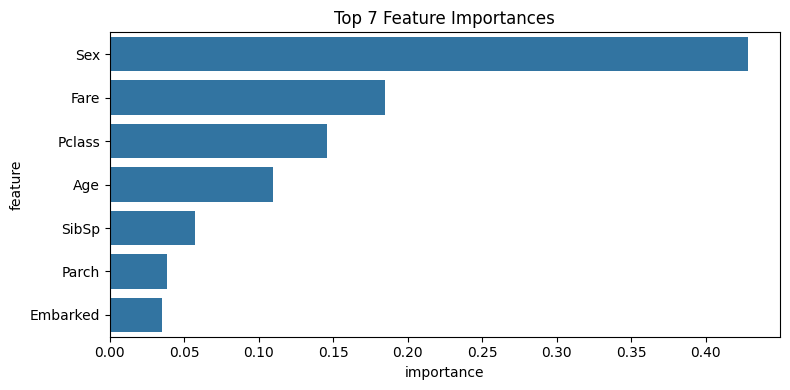


Feature Importances:
     feature  importance
1       Sex    0.428458
5      Fare    0.185053
0    Pclass    0.145794
2       Age    0.109894
3     SibSp    0.057500
4     Parch    0.038575
6  Embarked    0.034726


In [12]:
# Predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"✅ Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
importances = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(8,4))
sns.barplot(data=importances.head(7), x='importance', y='feature')
plt.title('Top 7 Feature Importances')
plt.tight_layout()
plt.show()
print("\nFeature Importances:\n", importances)

